# The First Part of the Assignment of IDS 2019-2020

Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. _DO NOT CLEAR THE OUTPUT of the notebook your are submitting!_ In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution. _Make sure to include group members' names and matriculation numbers_. If your name and student id are not included in the report, you will not receive any points!

Hint 1: While answering the questions, you will get a better and better impression of the given data. However, feel free to compute additional results and vizualizations to motivate the decisions you need to make, for example with respect to modification, simplification or sampling of the data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs: 
1. Romayssa Bedjaoui 402197
2. Moncef Benaicha 403758
3. Narek Gevorgyan 404010

In [1]:
# All import will be here
import pandas as pd
import numpy as np
import scipy as scp

import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.model_selection import GridSearchCV

## Preprocessing of the Dataset (5 points)

You should carry out some preprocessing steps before starting the analysis:

- Select 90% of 'population_density' dataset by random sampling.
  - Use one of the group member's student number as a seed.
- Add another column to the dataset:
  - Name it 'population_density_categorical'.
  - The values in this column depend on values in 'population_density' column and will be defined as follows:
    - 5824=<population density corresponding value in 'population_density_categorical' column: 'very high'
    - 4368=<population density<5824 corresponding value in 'population_density_categorical' column: 'high'
    - 2912=<population density<4368 corresponding value in 'population_density_categorical' column: 'medium'
    - 1456=<population density<2912 corresponding value in 'population_density_categorical' column: 'low'
    - population density<1456 corresponding value in 'population_density_categorical' column: 'very low'
- After completing this preprocessing step, export your final dataset as 'population_density_categorical.csv' dataset and use that for next steps of the assignment.
- If it is not directly mentioned, you should always use your extracted (above-created) dataset (without any cleaning).
- <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

### Extra data modifications 

In the original data feature 'holiday' reflects correct value for non-'None' DAY only for the first row of the DAY.
This issue could badly affect on the learning process as it reflects that ther is no correlation between the value of 'holiday' and the value of the 'date' variable. I suggest to correct dataset to get rid of this problem.

In [2]:
native_data = pd.read_csv("population_density.csv")

# Change 'holiday' value of samples that there is a non-'None' sample with the same date

native_data['date'] = native_data['date_time'].apply(lambda x: x.split()[0])

for row in range(native_data.shape[0]):
    if native_data.loc[row]['holiday'] != 'None':
        native_data.loc[native_data['date'] == native_data.loc[row]['date'], 'holiday'] = native_data.loc[row]['holiday']
native_data.drop(columns = ['date'])

dataset = native_data.sample(frac = 0.9, random_state = 34234)

dataset["population_density_categorical"] = list(
    map(
        lambda x: 'very high'
        if x >= 5824 else ('high'
                           if x >= 4368 else ('low'
                                              if x >= 2912 else 'very low')),
        dataset["population_density"]))

dataset.to_csv('population_density_categorical.csv')

## Question 1 - Insights into the Data (20 points):

In [3]:
data = pd.read_csv("population_density_categorical.csv", index_col = 0)

### Dealing with Outliers (10 points)

(a) Use a boxplot to find and remove the outliers from "temperature". Note that based on the boxplot the values greater than upper-whisker and less than lower-whisker are considered as the outliers. Now you should have two datasets (cleaned and original).

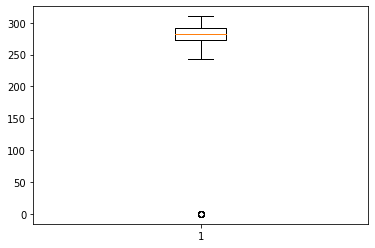

In [4]:
# Your code:
plt.boxplot(dataset["temperature"])
plt.show()
clean_dataset = dataset[dataset["temperature"] != 0]

#### We see from the box plot that the points that have feature 'temperature' =  0 are the outliers. Let's chech this result

In [5]:
upper_quartile = np.percentile(data['temperature'], 75)
lower_quartile = np.percentile(data['temperature'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = max(data[data['temperature'] <= upper_quartile + 1.5*iqr]['temperature'])
lower_whisker = min(data[data['temperature'] >= lower_quartile - 1.5*iqr]['temperature'])

for num in data['temperature']:
    if (num > upper_whisker or num < lower_whisker):
        print(num)    

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


(b) Compare basic statistical features of "temperature" (median, mean, and mode) in the cleaned and original datasets. Interpret the differences for these statistical values between the cleaned and original datasets.

In [6]:
# Your code:
dataset_temperature = dataset["temperature"]
clean_dataset_temperature = clean_dataset["temperature"]
x = PrettyTable(field_names=[
    'dataset', 'median of temperature', 'mean of temperature',
    'mode of temperature'
])
x.add_row([
    'original',
    np.median(dataset_temperature),
    np.mean(dataset_temperature),
    scp.stats.mode(dataset_temperature)[0][0]
])
x.add_row([
    'cleaned',
    np.median(clean_dataset_temperature),
    np.mean(clean_dataset_temperature),
    scp.stats.mode(clean_dataset_temperature)[0][0]])
print(x)

+----------+-----------------------+---------------------+---------------------+
| dataset  | median of temperature | mean of temperature | mode of temperature |
+----------+-----------------------+---------------------+---------------------+
| original |         282.46        |  281.2122535496988  |        274.15       |
| cleaned  |         282.46        |  281.27060306628545 |        274.15       |
+----------+-----------------------+---------------------+---------------------+


### Comparaison of the stats:

The original and the cleaned temperature have the same mode and median. Only the means are different.
This is because the mean is a non robust mesure, outliers affect the mean of data by skewing the values so the mean is no longer representative of the data.


(c) Compare the number of data rows before and after removing the outliers. How many data rows are removed by removing outliers?

In [7]:
print('Size of the original dataset:', dataset.shape)
print('Size of the cleaned dataset:', clean_dataset.shape)
print('Rows removed:', dataset.shape[0] - clean_dataset.shape[0])

Size of the original dataset: (43384, 11)
Size of the cleaned dataset: (43375, 11)
Rows removed: 9


### Basic Visualization (10 points)

(d) Visualize mean and median of "population_density" for non-'None' "holiday" values in the original dataset. Specify the "holiday" values for which the mean of "population_density" is maximal and for which it is minimal.

<function matplotlib.pyplot.show(*args, **kw)>

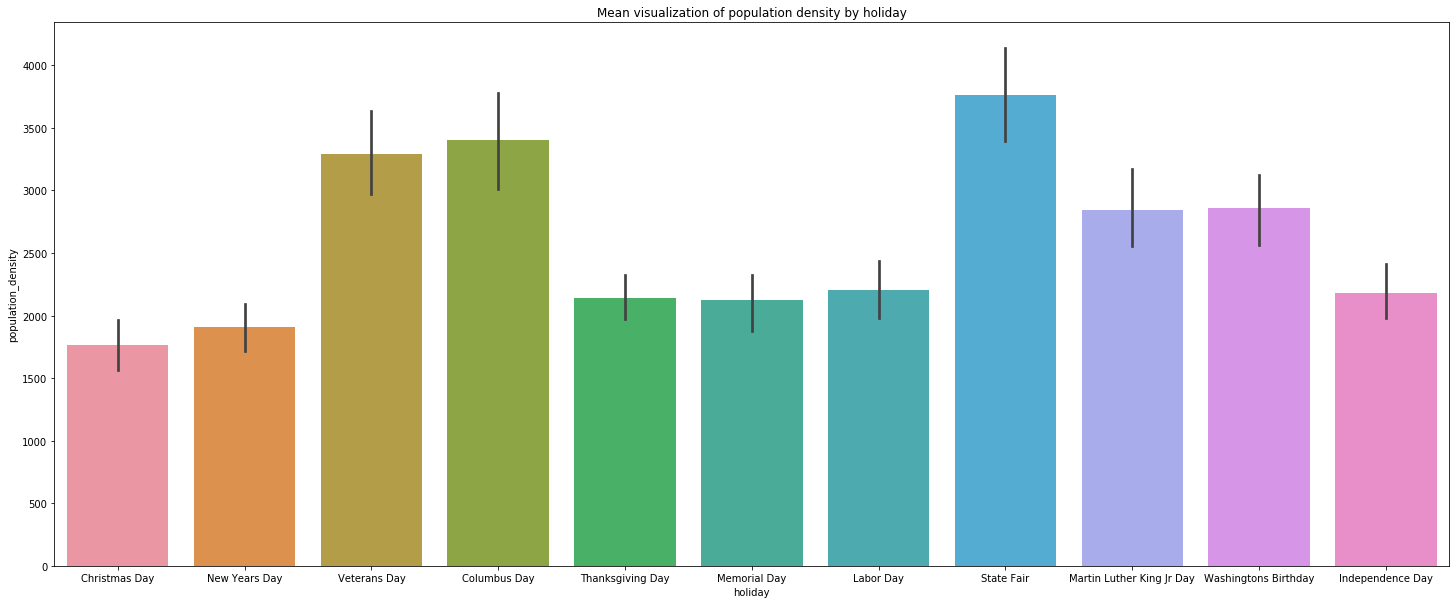

In [8]:
plt.figure(figsize=(25, 10))
sns.barplot(x = 'holiday', y = 'population_density', 
            data = dataset[dataset['holiday'] != 'None'], estimator = np.mean)
plt.title("Mean visualization of population density by holiday")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

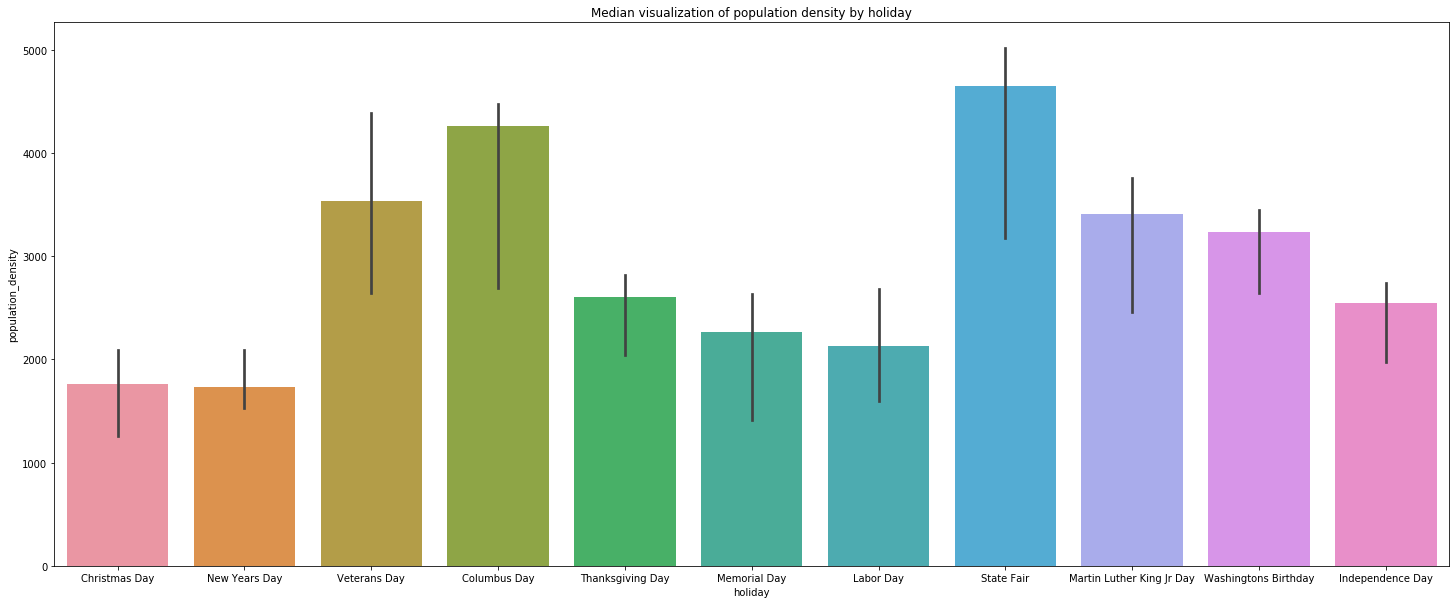

In [9]:
plt.figure(figsize=(25, 10))
sns.barplot(x = 'holiday', y = 'population_density', 
            data = data[data['holiday'] != 'None'], estimator = np.median)
plt.title("Median visualization of population density by holiday")
plt.show

As shown in the graph the "holiday" values for which the mean of "population_density" is :
- Maximal: State Fair.
- Minimal: Christmas Day.

<I> Nota benne: 
Before our extra-processing "holiday" values for which the mean of "population_density" were : Maximal: New Year day & Minimal: Columbus day.
</I>

(e) Plot the distribution of "temperature" in the original and cleaned datasets.

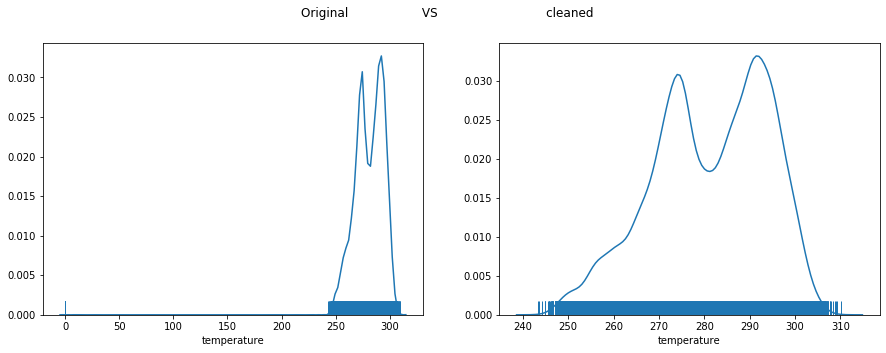

In [10]:
# Your code:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.distplot(dataset["temperature"],hist=False, rug=True, ax=ax1)

sns.distplot(clean_dataset["temperature"],hist=False, rug=True, ax=ax2)
plt.suptitle('Original                   VS                            cleaned')
plt.show()

(f) Explore the distribution of "population_density" and "temperature" together in the cleaned dataset. Specify the ranges of "temperature" and "population_density" for which the frequency of the data is the highest.

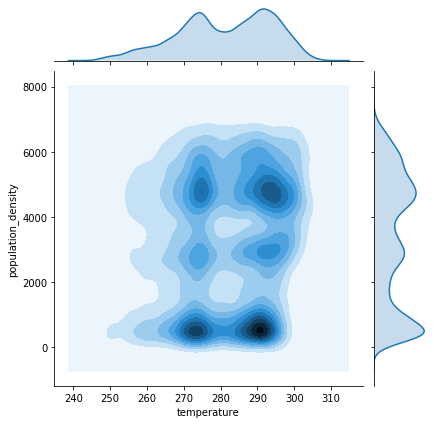

In [11]:
# Your code:
sns.jointplot(x="temperature",y="population_density", data=clean_dataset,kind='kde')

The frequency of the data is high for 4 ranges points :
    1. Population_density between 4000 & 6000 (~ 5000) AND Temperature between 270 & 280 (~275)
    2. Population_density between 0 & 2000 (~ 500) AND> Temperature between 270 & 280 (~ 275)
    3. Population_density between 4000 and 6000 (~5000) AND Temperature between 290 and 300 (~292)
    4. Population_density between 0 and 2000 (~ 500)  AND Temperature between 290 and 300 (~ 292)
    
 it shows also that the highest frequency range is:  
   - Population_density between 0 & 2000 (~ 500) AND> Temperature between 270 & 280 (~ 275)
   - Population_density between 0 and 2000 (~ 500)  AND Temperature between 290 and 300 (~ 292)

## Question 2 - Decision Trees (15 points):

(a) Add a categorical temperature column to the cleaned dataset based on the following rules and name it "temperature_categorical": - temperature >= upper_quartile (third quartile) corresponding value in 'temperature_categorical' column: 'high' - temperature <= lower_quartile (first quartile) corresponding value in 'temperature_categorical' column: 'low' - lower_quartile < temperature < upper_quartile corresponding value in 'temperature_categorical' column: 'medium'

In [12]:
new_cattemp_col = list()
for num in clean_dataset['temperature']:
    if num >= upper_quartile:
        new_cattemp_col.append('high')
    elif num <= lower_quartile:
        new_cattemp_col.append('low')
    else:
        new_cattemp_col.append('medium')
        
clean_dataset['temperature_categorical'] = new_cattemp_col

(b) In the new dataset (created in Section 'a'), consider "holiday", "temperature_categorical", and "weather_type" as the descriptive features and "population_density_categorical" as the target feature. Set the minimum number of samples for splitting to 5000 and make a decision tree based on entropy.

In [13]:
from p_decision_tree.DecisionTree import DecisionTree

descriptive_features = ['holiday', 'temperature_categorical', 'weather_type']

data_descriptive = clean_dataset[descriptive_features].values
data_label = clean_dataset["population_density_categorical"].values

decisionTree = DecisionTree(data_descriptive, descriptive_features, data_label, "entropy")

decisionTree.id3(0,5000)

dot = decisionTree.print_visualTree( render=True )


(c) What is the best attribute (based on entropy) for splitting the tree in the second round of ID3?

#### Answer:
'weather_type'

#### Explanation: 
From the attached image of decision tree (visualTree.gv.pdf) we can conclude that the feature 'temperature_categorical' is consider the most informatife for the first round. And for the second round to maximize information gain, algorithm choose 'weather_type'.



## Question 3 - Regression (10 points):

For this question (Q3), restrict your <b>extracted data set</b> to the columns _holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time_ and _population_density_. Drop the information on the date for _date_time_ and restrict the data to time values (hour) only.

We define _population_density_ to be our target feature, while all other features are considered descriptive.

In [14]:
data_regression = pd.read_csv("population_density_categorical.csv", index_col = 0)[['holiday', 'temperature', 'rain_1h', 'snow_1h', 
                                                                            'clouds_percentage', 'date_time', 'population_density']]

In [15]:
data_regression["date_time"]=pd.to_datetime(data_regression["date_time"])
data_regression["hour"]=data_regression["date_time"].dt.hour
del(data_regression["date_time"])

In [16]:
data_regression.head()

,holiday,temperature,rain_1h,snow_1h,clouds_percentage,population_density,hour
38079,None,276.93,0.0,0.0,1,2874,5
887,None,275.44,0.0,0.0,90,2911,9
841,None,278.78,0.0,0.0,75,5403,12
37527,None,284.00,0.0,0.0,5,2020,22
21471,None,275.48,0.0,0.0,75,3115,19


(a) Which features are suitable as an input for linear regression and which need to be modified first? Why?

Explanation: 

For regression features needs to be numerical and not categorical, this implies that the feature holiday needs to be changed all the other features are numerical and they can be used.

(b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows.

Explanation:

We apply get dummies o make the feature holiday non catigorical are there's no ranking difference between the categories.

In [17]:
data_regression= pd.get_dummies(data_regression, prefix="",columns=['holiday'])
data_regression.head(2)

,temperature,rain_1h,snow_1h,clouds_percentage,population_density,hour,_Christmas Day,_Columbus Day,_Independence Day,_Labor Day,_Martin Luther King Jr Day,_Memorial Day,_New Years Day,_None,_State Fair,_Thanksgiving Day,_Veterans Day,_Washingtons Birthday
38079,276.93,0.0,0.0,1,2874,5,0,0,0,0,0,0,0,1,0,0,0,0
887,275.44,0.0,0.0,90,2911,9,0,0,0,0,0,0,0,1,0,0,0,0


(c) To get a first idea about our data, plot the behaviour of the target feature (population_density) over time (date_time).

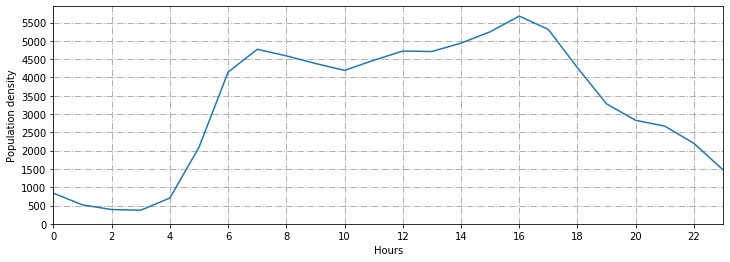

In [18]:
means_hour = data_regression.groupby(['hour'])['population_density'].mean()
fig, ax = plt.subplots(figsize=(12,4))
means_hour.plot(ax=ax)
#Plot configuration
plt.grid( linestyle='dashdot', linewidth=1)
plt.xlabel('Hours')
plt.ylabel('Population density')
plt.xticks(np.arange(0, 24, step=2))
plt.yticks(np.arange(0, 6000, step=500))
plt.show()

(d) Create two distinct subsets of the data. Use sampling methods as described in the lecture. You should end up with two DIFFERENT sample data sets _RegA, RegB_. Include these data sets in the submitted data set zip file.

Which sampling methods did you choose and why? Which one do you expect to result in a better classifier?

In [19]:
regA = data_regression.sample(frac = 0.5)
regA.to_csv('reagA.csv')

regB = data_regression.tail(int(data_regression.shape[0]/2))
regB.to_csv('reagB.csv')

Explanation:

- regA: is a sample where we choosed a random sampling.
- regB: is a sample where we used a Bottom sampling.

Normaly regA will give better results as regB as random sampling will be more diversified than a bottom sampling, but our data is already randomized, so we can't infer anything before testing.

(e) Train a linear regression classifier based on each of the two sample data sets _RegA, RegB_ created before.

In [20]:
regA_inputs = regA.drop(columns = ['population_density'])
regA_output = regA['population_density']

regB_inputs = regB.drop(columns = ['population_density'])
regB_output = regB['population_density']


In [21]:
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(regA_inputs, regA_output, 
                                                                test_size=0.4, random_state=42)

In [22]:
X_train_B, X_test_B,y_train_B, y_test_B = train_test_split(regB_inputs, regB_output, 
                                                               test_size=0.4, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

classifierA = LinearRegression()
classifierA.fit(X_train_A,y_train_A)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
classifierB = LinearRegression()
classifierB.fit(X_train_B,y_train_B)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(f) Visualize both computed regression functions in one plot each, combined with the original data set. For example, you can show a plot similar to 3(c) and insert the regression functions result.

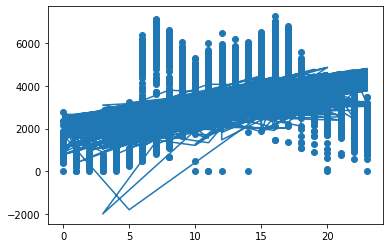

In [25]:
y_predictA = classifierA.predict(X_test_A)
plt.scatter(X_test_A.iloc[:,4],y_test_A)
plt.plot(X_test_A.iloc[:,4],y_predictA)


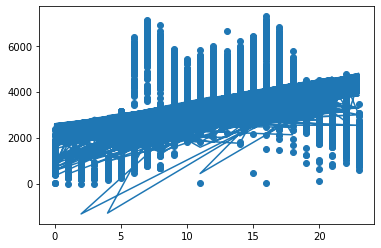

In [26]:
y_predictB = classifierB.predict(X_test_B)
plt.scatter(X_test_B.iloc[:,4],y_test_B)
plt.plot(X_test_B.iloc[:,4],y_predictB)

(g) For each of the two resulting models compute and print the mean squared error, mean absolute error and median squared error with respect to the original, non-sampled data set. Also, present plots showing the errors and squared errors.

In [27]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error

x = PrettyTable(field_names=[
    'Model ','Mean squared error', 'Mean absolute error','median absolute error'])
x.add_row(['regA ',
    mean_squared_error(y_test_A, y_predictA),
    mean_absolute_error(y_test_A, y_predictA),
    median_absolute_error(y_test_B, y_predictB)
])
x.add_row(['regB ',
    mean_squared_error(y_test_B, y_predictB),
    mean_absolute_error(y_test_B, y_predictB),
    median_absolute_error(y_test_B, y_predictB)
])
print(x)


+--------+--------------------+---------------------+-----------------------+
| Model  | Mean squared error | Mean absolute error | median absolute error |
+--------+--------------------+---------------------+-----------------------+
| regA   | 3367404.357540979  |  1622.1027902529354 |   1626.5664138157977  |
| regB   |   3324414.747874   |  1610.1241598478382 |   1626.5664138157977  |
+--------+--------------------+---------------------+-----------------------+


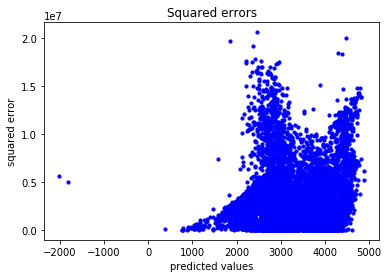

In [28]:
plt.scatter(y_predictA, (y_test_A -y_predictA) ** 2, color = "blue", s = 10,) 
plt.title("Squared errors")
plt.xlabel('predicted values')
plt.ylabel('squared error')
plt.show()

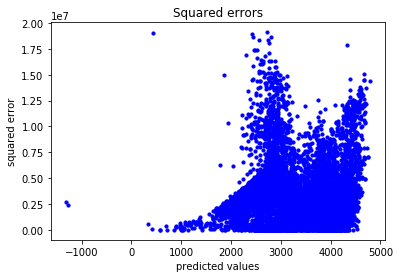

In [29]:
plt.scatter(y_predictB, (y_test_B -y_predictB) ** 2, color = "blue", s = 10,) 
plt.title("Squared errors")
plt.xlabel('predicted values')
plt.ylabel('squared error')
plt.show()

(h) Interpret and evaluate the two models and compare them. Why are they similar/different? Which model do you recommend and why? How do you think the applied methods could be improved to get better results?

Explanation:

As shown in the computed errors metrics regA performs better than regB, as we expected doing a random sampling is better than bottom sampling.

#### How to improve results:

1. Doing outliers filletring, this will reduce the noise in the data.
2. Doing two steps features selection and eliminating low correlated features with our target feature at first than doing a correlation between the input features and filtering correlated one by keeping one only(the most correlated with our target feature).
3. Scaling and normalizing our data will help also to minimize the error.

## Question 4 - Support Vector Machines (10 points):

For this question (Q4), restrict your <b>extracted data set</b> to the columns _holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time_ and _population_density_categorical_. For _date_time_, drop the information on the date and restrict the data to time values only.
We define _population_density_categorical_ to be our target feature, while all other features are considered descriptive.

In [227]:
dataset = pd.read_csv("population_density_categorical.csv", index_col = 0)

In [228]:
# Your code:
columns=["holiday", "temperature", "rain_1h", "snow_1h", "clouds_percentage", "date_time","population_density_categorical"]
data_SVM=dataset[columns]
data_SVM["date_time"]=pd.to_datetime(data_SVM["date_time"])
data_SVM["time"]=data_SVM["date_time"].dt.time
del(data_SVM["date_time"])
data_SVM.shape

(43384, 7)

(a) Which features are suitable as an input for SVM and which need to be modified first? Modify the data as needed and provide a brief explanation.

In [229]:
# Your code
data_SVM= pd.get_dummies(data_SVM, prefix='holiday_', columns=['holiday'])
data_SVM.head(3)

,temperature,rain_1h,snow_1h,clouds_percentage,population_density_categorical,time,holiday__Christmas Day,holiday__Columbus Day,holiday__Independence Day,holiday__Labor Day,holiday__Martin Luther King Jr Day,holiday__Memorial Day,holiday__New Years Day,holiday__None,holiday__State Fair,holiday__Thanksgiving Day,holiday__Veterans Day,holiday__Washingtons Birthday
38079,276.93,0.0,0.0,1,very low,05:00:00,0,0,0,0,0,0,0,1,0,0,0,0
887,275.44,0.0,0.0,90,very low,09:00:00,0,0,0,0,0,0,0,1,0,0,0,0
841,278.78,0.0,0.0,75,high,12:00:00,0,0,0,0,0,0,0,1,0,0,0,0


In [230]:
import time as tm
import numpy as np 
# data_SVM.info()
import datetime 
data_SVM["time"] = list(map(lambda x : int(str(x).split(':')[0]), data_SVM["time"]))

data_SVM['hr_sin'] = list(map(lambda x: np.sin(x*(2.*np.pi/24)), data_SVM["time"])) 
data_SVM['hr_cos'] = list(map(lambda x: np.cos(x*(2.*np.pi/24)), data_SVM["time"]))
del(data_SVM["time"])
data_SVM.head(3)

,temperature,rain_1h,snow_1h,clouds_percentage,population_density_categorical,holiday__Christmas Day,holiday__Columbus Day,holiday__Independence Day,holiday__Labor Day,holiday__Martin Luther King Jr Day,holiday__Memorial Day,holiday__New Years Day,holiday__None,holiday__State Fair,holiday__Thanksgiving Day,holiday__Veterans Day,holiday__Washingtons Birthday,hr_sin,hr_cos
38079,276.93,0.0,0.0,1,very low,0,0,0,0,0,0,0,1,0,0,0,0,9.659258e-01,0.258819
887,275.44,0.0,0.0,90,very low,0,0,0,0,0,0,0,1,0,0,0,0,7.071068e-01,-0.707107
841,278.78,0.0,0.0,75,high,0,0,0,0,0,0,0,1,0,0,0,0,1.224647e-16,-1.000000


Explanation:

The SVM assume that the input features are numerical and not categorical, this implies:

1. The features that are suitable as an input are: Temperature, rain_1h, snow_1h, clouds_percentage
2. The features that are not suitable as an input are: holiday, date_time

Because the first features are real/int values so they don't need to be transformed, and the second features are objects, they need to be encoded.

- <b>Holidays</b> : getdummies strategy will avoid to infere a difference of importance in holidays. 
- <b>Time</b>     : time is cyclic and a simple hot-encoding doesn't handle cyclical data. In our case for example: 23:00 will be far from 00:00. To correclty encode time we matched it with sinus and cosinus functions and added two features: time_sin and time_cos.

<i>Nota Bene: This method added 12 features (from 7 to 19 features) to our initial dataset, but SVM reacts very well to high-dimensional data.

In [231]:
# transformation before learning
# Scaling inputs
inputs=["temperature","rain_1h","snow_1h","clouds_percentage","holiday__Christmas Day","holiday__Columbus Day","holiday__Independence Day","holiday__Labor Day","holiday__Martin Luther King Jr Day","holiday__Memorial Day","holiday__New Years Day","holiday__None","holiday__State Fair","holiday__Thanksgiving Day","holiday__Veterans Day","holiday__Washingtons Birthday","hr_sin","hr_cos"]
data_SVM_inputs = StandardScaler().fit_transform(data_SVM[inputs])

#Transforming the target into binary classses
le =LabelEncoder()
le.fit(data_SVM["population_density_categorical"])
LabelEncoder()
le.classes_

data_SVM_output=le.transform(data_SVM["population_density_categorical"])

### Remark
Before applying SVM, data has to be scalled to avoid high range values for our features. This influences the precision and also time computing. SVM also expect a binary target to learn.

(b) Divide the data set into a training set _svmTrain_ and a test set _svmTest_ and briefly motivate your division strategy. Include these data sets in the data set zip file you submit.

Hint: Training the SVMs will take longer for a large training set!

In [232]:
# Your code:
import json
X_train, X_test, y_train, y_test = train_test_split(data_SVM_inputs, data_SVM_output, test_size=0.7, random_state=42)
# to do : store the dataset to a file

svmTrain={'x_train': X_train, 'y_train':y_train}
svmTest={'x_test': X_test, 'y_test':y_test}

with open('svmTrain', 'w') as f:
    for key in svmTrain.keys():
        f.write("%s,%s\n"%(key,svmTrain[key]))
        
with open('svmTest', 'w') as f:
    for key in svmTest.keys():
        f.write("%s,%s\n"%(key,svmTest[key]))

Explanation:

SVM need a not large and with clearly classification boundery data to make a good learning. There are few methods that could infer a best train, test sets such as: Clustring, Neighbourhood, active learning, random sampling.

We choose random Sampling because it is less time consumming and less complicated to implements as the others.

We also choosed 30% of the data as data_trainig because of time consumtion.

(c) Use the training set to train 3 different SVMs with different combinations of the parameters. Use at least two distinct values for the parameters _kernel_ and _C_.

In [233]:
#model 1 linear
start = time.time()
clf = svm.SVC()
param_grid = [{'kernel':['linear'],
             'C':[10,0.1,0.001] }]
svm_1 = GridSearchCV(clf,param_grid)
svm_1.fit(X_train,y_train)
end = time.time()
print("Time required ="+str(end-start)+"s")

Time required =48.183419942855835s


In [234]:
x = PrettyTable(field_names=[
    '**Kernel**','**Best score**','**Best parameters**'
])
x.add_row(['Linear ',
    svm_1.best_score_ ,
    svm_1.best_params_
])
print(x)

pred_linear = svm_1.predict(X_test)  

+------------+--------------------+----------------------------------+
| **Kernel** |   **Best score**   |       **Best parameters**        |
+------------+--------------------+----------------------------------+
|  Linear    | 0.6805993084902036 | {'C': 0.001, 'kernel': 'linear'} |
+------------+--------------------+----------------------------------+


In [235]:
print("Grid scores on development set:")
print()
means_svm_1 = svm_1.cv_results_['mean_test_score']
means_svm_1
means_svm_1.mean()

Grid scores on development set:



0.6791394544756052

In [236]:
#model 2 sigmoid
start = time.time()
clf = svm.SVC()
param_grid = [{'kernel':['sigmoid'],
             'C':[10,0.1,0.001] }]
svm_2 = GridSearchCV(clf,param_grid)
svm_2.fit(X_train,y_train)
end = time.time()
print("Time required ="+str(end-start)+"s")

Time required =39.25049805641174s


In [237]:
x = PrettyTable(field_names=[
    '**Kernel**','**Best score**','**Best parameters**'
])
x.add_row(['Sigmoid ',
    svm_2.best_score_ ,
    svm_2.best_params_
])
print(x)

pred_sigmoid = svm_2.predict(X_test)  

+------------+--------------------+---------------------------------+
| **Kernel** |   **Best score**   |       **Best parameters**       |
+------------+--------------------+---------------------------------+
|  Sigmoid   | 0.6772185939300807 | {'C': 0.1, 'kernel': 'sigmoid'} |
+------------+--------------------+---------------------------------+


In [238]:
print("Grid scores on development set:")
print()
means_svm_2 = svm_2.cv_results_['mean_test_score']
means_svm_2
means_svm_2.mean()

Grid scores on development set:



0.5757459341785119

In [239]:
# model 3 rbf
start = time.time()
clf = svm.SVC()
param_grid = [{'kernel':['rbf'],'gamma':[5,10],
             'C':[10,0.1] }]
svm_3= GridSearchCV(clf,param_grid)
svm_3.fit(X_train,y_train)
end = time.time()
print("Time required ="+str(end-start)+"s")


Time required =109.81349301338196s


In [240]:
x = PrettyTable(field_names=[
    '**Kernel**','**Best score**','**Best parameters**'
])
x.add_row(['rbfr',
    svm_3.best_score_ ,
    svm_3.best_params_
])
print(x)

pred_rbfr = svm_3.predict(X_test) 

+------------+------------------+----------------------------------------+
| **Kernel** |  **Best score**  |          **Best parameters**           |
+------------+------------------+----------------------------------------+
|    rbfr    | 0.72047637341529 | {'C': 10, 'gamma': 5, 'kernel': 'rbf'} |
+------------+------------------+----------------------------------------+


In [241]:
print("Grid scores on development set:")
print()
means_svm_3 = svm_3.cv_results_['mean_test_score']
means_svm_3


Grid scores on development set:



array([0.72047637, 0.71056473, 0.71402228, 0.69481368])

(d) Compute and print the mean accurracy and classification report of the trained SVMs with respect to the test set (as shown in instruction).

In [242]:
from sklearn.metrics import classification_report

# Your code:
x = PrettyTable(field_names=[
    'model', 'mean accurracy', 'classification report'
])
x.add_row([
    'Linear model',
    means_svm_1.mean(),
    classification_report(y_test, pred_linear)])
x.add_row([
    'sigmoid',
    means_svm_2.mean(),
    classification_report(y_test, pred_sigmoid)])

x.add_row([
    'RBF',
    means_svm_3.mean(),
    classification_report(y_test, pred_rbfr)])
print(x) 

+--------------+--------------------+-------------------------------------------------------+
|    model     |   mean accurracy   |                 classification report                 |
+--------------+--------------------+-------------------------------------------------------+
| Linear model | 0.6791394544756052 |               precision    recall  f1-score   support |
|              |                    |                                                       |
|              |                    |            0       0.58      0.78      0.67      8526 |
|              |                    |            1       0.52      0.39      0.45      5731 |
|              |                    |            2       0.00      0.00      0.00      3020 |
|              |                    |            3       0.82      0.91      0.86     13092 |
|              |                    |                                                       |
|              |                    |     accuracy          

(e) Interpret and evaluate the 3 SVMs and compare them. Why are they similar/different? Which SVM do you recommend and why?

Explanation:

Sigmoig kernel is used for binary classifications, therefore is give relatively bad result.

Beetween RBF and linear model we would choose the first one because even thought it works slowlier it provides higher accuracy. 

## Question 5 - Neural Networks (20 points)

In this question consider the whole <b>dataset that you have created in the _Preprocessing</b> of Dataset_ section. The target feature is _population_density_categorical_.

To avoid performance problems, use the first 4000 rows of your dataset (you will need 2000 for training and 2000 for testing).

In [171]:
dataset = pd.read_csv("population_density_categorical.csv", index_col = 0)[:4000]

In [172]:
dataset.head()

,holiday,temperature,rain_1h,snow_1h,clouds_percentage,weather_type,weather_type_details,date_time,population_density,date,population_density_categorical
38079,None,276.93,0.0,0.0,1,Mist,mist,10/16/2017 5:00,2874,10/16/2017,very low
887,None,275.44,0.0,0.0,90,Clouds,overcast clouds,11/4/2012 9:00,2911,11/4/2012,very low
841,None,278.78,0.0,0.0,75,Clouds,broken clouds,11/2/2012 12:00,5403,11/2/2012,high
37527,None,284.00,0.0,0.0,5,Clear,sky is clear,9/27/2017 22:00,2020,9/27/2017,very low
21471,None,275.48,0.0,0.0,75,Mist,mist,2/23/2016 19:00,3115,2/23/2016,low


(a) What are the possible inputs of your network? - Show the possible extracted features. - Show the number of possible patterns of inputs for the categorical data.

In [173]:
dataset['workday'] = dataset['holiday'].apply(lambda x: 1 if x == 'None' else 0)

dataset['date_time_form'] = pd.to_datetime(dataset['date_time'])

dataset['time'] =  dataset['date_time_form'].apply(lambda x: x.hour)
dataset['hr_sin'] = list(map(lambda x: np.sin(x*(2.*np.pi/24)), dataset["time"])) 
dataset['hr_cos'] = list(map(lambda x: np.cos(x*(2.*np.pi/24)), dataset["time"]))

#dataset['date'] = dataset['date_time'].apply(lambda x: x.split()[0])
#dataset['time'] = dataset['date_time'].apply(lambda x: x.split()[1])
#dataset['time'] = dataset['time'].apply(lambda x: int(x.split(':')[0]))
#dataset['date_time'] = pd.to_datetime(dataset['date_time'])

dataset['week'] = dataset['date_time_form'].apply(lambda x: x.isocalendar()[1])

dataset['w_sin'] = list(map(lambda x: np.sin(x*(2.*np.pi/52)), dataset["week"])) 
dataset['w_cos'] = list(map(lambda x: np.cos(x*(2.*np.pi/52)), dataset["week"]))



In [174]:
dataset.head()

,holiday,temperature,rain_1h,snow_1h,clouds_percentage,weather_type,weather_type_details,date_time,population_density,date,population_density_categorical,workday,date_time_form,time,hr_sin,hr_cos,week,w_sin,w_cos
38079,None,276.93,0.0,0.0,1,Mist,mist,10/16/2017 5:00,2874,10/16/2017,very low,1,2017-10-16 05:00:00,5,9.659258e-01,0.258819,42,-0.935016,3.546049e-01
887,None,275.44,0.0,0.0,90,Clouds,overcast clouds,11/4/2012 9:00,2911,11/4/2012,very low,1,2012-11-04 09:00:00,9,7.071068e-01,-0.707107,44,-0.822984,5.680647e-01
841,None,278.78,0.0,0.0,75,Clouds,broken clouds,11/2/2012 12:00,5403,11/2/2012,high,1,2012-11-02 12:00:00,12,1.224647e-16,-1.000000,44,-0.822984,5.680647e-01
37527,None,284.00,0.0,0.0,5,Clear,sky is clear,9/27/2017 22:00,2020,9/27/2017,very low,1,2017-09-27 22:00:00,22,-5.000000e-01,0.866025,39,-1.000000,-1.836970e-16
21471,None,275.48,0.0,0.0,75,Mist,mist,2/23/2016 19:00,3115,2/23/2016,low,1,2016-02-23 19:00:00,19,-9.659258e-01,0.258819,8,0.822984,5.680647e-01


Explanation:

#### holiday:
We could extract feature 'workday', and instead of using categorical variable , that is needed to be converted to numerical for NN, we use numerical.

$\Rightarrow holiday = \{\textbf{holiday}, \textbf{workday}\}$


#### date_time:
This would be more convenient for us to separate this variable to date and time. We will use feature 'date_time_form' the facilitate our goal.
We need to deal with date carefully when we split data to traing and test set. Nevertheles, date gives us important information about the season that could have huge affect on the result.

For this purpose, we can consider not date by itself but the number of week it represent. That's how we got the variable 'week'. 'week' takes valuse form 1 to 52 and it is also cyclic. That's why we could use variables 'w_sin' and 	'w_cos' that preserve the margin beetween dates, whereas numerical feature could not deal with this task.

$\Rightarrow date = \{\textbf{week}, (\textbf{w_sin} , \textbf{w_cos})\}$

Analogically,


$\Rightarrow time = \{\textbf{hour}, (\textbf{h_sin} , \textbf{h_cos})       \}$

As we see, there are 8 possible suitable patterns of inputs.

(b) Before using the Neural Network algorithm, do you think it provides an accurate result? Why? - Your explanation should be supported by data.

Explanation: I think it would not provide aacurate score, as our data does not satisfy the rule of thumb:

The number of training examples: 2000
Number of nodes in input layer: 20 
Number of nodes in output layer: 5

If we even consider model with one hidden layer with 20 nodes, we will understand that we do not have enough traing examples.


In [180]:
# One-hot encoding for 'holiday' feature
dataset_b = pd.get_dummies(dataset, columns = ['holiday'])

# Features we are going to use as input for algorithm
features = [x for x in dataset_b.columns if x not in ['week', 'population_density_categorical', 'time', 'population_density', 'date_time', 
                                                    'weather_type', 'weather_type_details', 'workday', 'date_time_form', 'date']]
X = dataset_b[features]
X.shape

(4000, 20)

(c) Which features can be used for designing your network as inputs? Why? - Which features should be changed (example: from categorical to numerical or numerical to categorical)? Why? - Convert the features.

#### Explanation:

NN takes as input only numerical values. Therefore we need to use one of the pattersn for categorical data stated above. 

For 'holiday' variable we will use one-hot encoding as it preserve more information then if we take 'workday'.

For 'date_time' variabel we will consider (w_sin, w_cos) and (h_sin, h_cos) instead, for above-mentioned advantages.

We will not consider features: 'weather_type', 'weather_type_details' for two reasons:

1) We found that there are some duplicates on date_time with different 'weather_type' and 'weather_type_details'  values. This could confuse the model as for the same time and date the values for  'weather_type' and 'weather_type_details' differ.

2) It is obvious that 'weather_type' and 'weather_type_details' features are redundant as it is possible to predict their values based on values of the following features: 'temperature', 'rain_1h', 'snow_1h', 'clouds_percentage', 'day' and 'time'

In [181]:
# One-hot encoding for 'holiday' feature
dataset = pd.get_dummies(dataset, columns = ['holiday'])

# Features we are going to use as input for algorithm
features = [x for x in dataset.columns if x not in ['week', 'population_density_categorical', 'time', 'population_density', 'date_time', 
                                                    'weather_type', 'weather_type_details', 'workday', 'date_time_form', 'date']]


(d) Train your network with default hyperparameters and return the parameters.

In [182]:
X = dataset[features]
y = dataset['population_density_categorical']

# Before submiting features as input we need to scale them
X['temperature'] = (X.temperature - X.temperature.min())/(X.temperature.max() - X.temperature.min())
X['rain_1h'] = (X.rain_1h - X.rain_1h.min())/(X.rain_1h.max() - X.rain_1h.min())
X['clouds_percentage'] = X['clouds_percentage']/100

In [183]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
nn = MLPClassifier()
nn.fit(X_train,y_train)
nn.score(X_test,y_test)

0.7415

In [184]:
nn.get_params

<bound method BaseEstimator.get_params of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)>

(e) Try to find an optimized number of hidden layers and nodes. - Start with default numbers and then at least go with one number above and one number below the default. - Use the 2000 rows of the data for training. - What are the optimized numbers of hidden layers and nodes that you have found?

In [185]:
# Train model with 2 inner layers
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
nn = MLPClassifier(hidden_layer_sizes=(100, 100))
nn.fit(X_train,y_train)
print(nn.score(X_test,y_test))


# Train model with 3 inner layers
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
nn = MLPClassifier(hidden_layer_sizes=(100, 100, 100))
nn.fit(X_train,y_train)
print(nn.score(X_test,y_test))


0.7205
0.72


In [186]:
# Train model with one inner layer and 2 times less nodes

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
nn = MLPClassifier(hidden_layer_sizes=(50))
nn.fit(X_train,y_train)
print(nn.score(X_test,y_test))

# Train model with one inner layer and 2 times nore nodes
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
nn = MLPClassifier(hidden_layer_sizes=(200))
nn.fit(X_train,y_train)
print(nn.score(X_test,y_test))

0.715
0.732


In [204]:
# Train model with 2 inner layers and 2 times more nodes

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
nn = MLPClassifier(hidden_layer_sizes=(200, 200))
nn.fit(X_train,y_train)
print(nn.score(X_test,y_test))

0.74


Explanation:

As the default number of hidden layers is 1, we will consider cased #layers = 2 and #layers = 3
And as the default number of nodes in layer is equal to 100, there is no sense to change the number of nodes by one. To see the tendency of score depending on # of nodes it is better to conseider cases: # of nodes is 2 times bigger/less then default number

#### Answer:

Optimal # of layers = 2
Optimal # of nodes in a layer is approximately 200


(f) Try to train your model with one linear activation function and one non-linear activation function. Use the default number of hidden layers and nodes. - Name the functions and explain how the results are different and why. - You can use evaluation metrics to show which activation function works better for this data set. - Use the 2000 rows of the data for training.

In [205]:
# Your code: (linear activation function):
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
nn = MLPClassifier(hidden_layer_sizes=(200, 200), activation = 'identity')
nn.fit(X_train,y_train)
print(nn.score(X_test,y_test))


0.6645


In [206]:
# Your code: (non-linear activation function):

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
nn = MLPClassifier(hidden_layer_sizes=(200, 200), activation = 'logistic')
nn.fit(X_train,y_train)
print(nn.score(X_test,y_test))

0.723


Explanation:

We consider 2 activation functions: 'identity'(linear) and 'logistic'(non-linear)

Score of the NN with optimal parametrs is higher for 'logistic' activation function. I think the advantage of non-linear activation functions is gives oppurtunity to predict even non-linear combination of inputs. Whereas NN with linear activation function whould give results lige single preceptron, because linear function of linear combination of inputs will give another linear function.


## Question 6 - Evaluation (10 Points)

(a) Consider one of the models in question 4 (c) of your choice, one neural network with optimized number of hidden layers and nodes from question 5 (e), and the neural network with non-linear activation function from question 5 (f), for a total of _three_ models, together with their respective datasets. Compute the following metrics for a 3-fold cross validation performed on each model:

In [144]:
dataset = pd.read_csv("population_density_categorical.csv",index_col=0)

#  We found that there is some duplicates on date_time with different weather type values. We will keep the first inserted value as considered valid

dataset.drop_duplicates(subset ='date_time', keep = 'first', inplace = True)

# DateTime Processing.

#dataset["date"] = [ x.split(" ")[0] for x in dataset["date_time"]]
dataset["time"] = [ int(x.split(" ")[1].split(":")[0]) for x in dataset["date_time"]]
dataset['date_time'] = pd.to_datetime(dataset['date_time'])
dataset['week'] = dataset['date_time'].apply(lambda x: x.isocalendar()[1])
dataset['w_sin'] = list(map(lambda x: np.sin(x*(2.*np.pi/52)), dataset["week"]))
dataset['w_cos'] = list(map(lambda x: np.cos(x*(2.*np.pi/52)), dataset["week"]))
dataset['hr_sin'] = list(map(lambda x: np.sin(x*(2.*np.pi/24)), dataset["time"]))
dataset['hr_cos'] = list(map(lambda x: np.cos(x*(2.*np.pi/24)), dataset["time"]))

# Data encoding

dataset = pd.get_dummies(dataset, columns=["holiday"])

# Data standardization

dataset['temperature'] = (dataset.temperature - dataset.temperature.min())/(dataset.temperature.max() - dataset.temperature.min())
dataset['rain_1h'] = (dataset.rain_1h - dataset.rain_1h.min())/(dataset.rain_1h.max() - dataset.rain_1h.min())
dataset['clouds_percentage'] = dataset['clouds_percentage']/100

# Features selections

feature = [x for x in dataset.columns if x not in ['week', 'population_density_categorical', 'time', 'date', 'population_density', 'date_time', 'weather_type', 'weather_type_details']]

# Dataframe to Numpy
dataset = dataset.iloc[:4000,:]
X = dataset[feature].values
y = dataset['population_density_categorical'].values
labels = list(set(y))



In [145]:
# Models

Models = {
    'SVM': {
        "Model": SVC(kernel="linear"),
        "Confusion Matrix Train": [],
        "Confusion Matrix Test": [],
        "Precision": [],
        "Recall": [],
        "F1-score": [],
        "Accuracy Train": [],
        "Accuracy Test": []
    },
    "MLP Optimized": {
        "Model": MLPClassifier(hidden_layer_sizes=(200,200, )),
        "Confusion Matrix Train": [],
        "Confusion Matrix Test": [],
        "Precision": [],
        "Recall": [],
        "F1-score": [],
        "Accuracy Train": [],
        "Accuracy Test": []
    },
    "MLP Non-linear": {
        "Model": MLPClassifier(activation="tanh"),
        "Confusion Matrix Train": [],
        "Accuracy Train": [],
        "Confusion Matrix Test": [],
        "Precision": [],
        "Recall": [],
        "F1-score": [],
        "Accuracy Test": []
    }
}


In [146]:
# KFold Generator.
kfolds = KFold(n_splits=3, shuffle=True)
for train_index, test_index in kfolds.split(X):
    for model in Models.keys():
        # Train Part
        Models[model]["Model"].fit(X[train_index], y[train_index])
        predicted = Models[model]["Model"].predict(X[train_index])
        Models[model]["Confusion Matrix Train"].append(
            confusion_matrix(y[train_index], predicted, labels=labels))
        Models[model]["Accuracy Train"].append(
            accuracy_score(y[train_index], predicted))
        # Test Part
        predicted = Models[model]["Model"].predict(X[test_index])
        Models[model]["Confusion Matrix Test"].append(
            confusion_matrix(y[test_index], predicted, labels=labels))
        Models[model]["Accuracy Test"].append(
            accuracy_score(y[test_index], predicted))
        Models[model]["Precision"].append(
            precision_score(y[test_index], predicted, average="micro"))
        Models[model]["Recall"].append(
            recall_score(y[test_index], predicted, average="micro"))
        Models[model]["F1-score"].append(
            f1_score(y[test_index], predicted, average="micro"))

- Confusion matrices on the training data (sum cell-by-cell the results of each fold)

In [147]:
# Your code for the confusion matrices on the training data
for model in Models:
    total_conf = np.zeros((len(labels),len(labels)))
    for matrix in Models[model]["Confusion Matrix Train"]:
        total_conf = np.add(total_conf,matrix)
    print(f"\nTrain Confusion Matrix for {model}:")
    print(pd.DataFrame(total_conf, index=labels, columns=labels))



Train Confusion Matrix for SVM:
           very low  very high    high    low
very low     3114.0        0.0   199.0  167.0
very high     147.0        0.0   508.0  149.0
high          206.0        0.0  1751.0  317.0
low           288.0        0.0   566.0  588.0

Train Confusion Matrix for MLP Optimized:
           very low  very high    high    low
very low     3127.0       98.0   154.0  101.0
very high      43.0      577.0   182.0    2.0
high           49.0      155.0  2015.0   55.0
low           275.0       68.0   538.0  561.0

Train Confusion Matrix for MLP Non-linear:
           very low  very high    high    low
very low     3061.0       57.0   194.0  168.0
very high      85.0      271.0   448.0    0.0
high          188.0       75.0  1817.0  194.0
low           280.0       37.0   582.0  543.0


- Confusion matrices on the test data (sum cell-by-cell the results of each fold)

In [148]:
# Your code for the confusion matrices on the test data
for model in Models:
    total_conf = np.zeros((len(labels),len(labels)))
    for matrix in Models[model]["Confusion Matrix Test"]:
        total_conf = np.add(total_conf,matrix)
    print(f"\nTest Confusion Matrix for {model}:")
    print(pd.DataFrame(total_conf, index=labels, columns=labels))



Test Confusion Matrix for SVM:
           very low  very high   high    low
very low     1553.0        0.0  102.0   85.0
very high      78.0        0.0  249.0   75.0
high          102.0        0.0  876.0  159.0
low           148.0        0.0  287.0  286.0

Test Confusion Matrix for MLP Optimized:
           very low  very high   high    low
very low     1528.0       62.0   87.0   63.0
very high      39.0      253.0  108.0    2.0
high           45.0      106.0  926.0   60.0
low           169.0       44.0  292.0  216.0

Test Confusion Matrix for MLP Non-linear:
           very low  very high   high    low
very low     1523.0       28.0   99.0   90.0
very high      47.0      122.0  233.0    0.0
high           93.0       45.0  897.0  102.0
low           145.0       22.0  291.0  263.0


- Precision, recall and F1-scores on the test data (give explicitly the result for each fold)

In [149]:
# Your code for precision, recall and F1-scores on the test data
for model in Models:
    for i in range(len(Models[model]["Precision"])):
        print(f'The model {model} on Fold {i} has: Precision = {Models[model]["Precision"][i]}, recall = {Models[model]["Recall"][i]} and F1-Score = {Models[model]["F1-score"][i]}')


The model SVM on Fold 0 has: Precision = 0.6731634182908546, recall = 0.6731634182908546 and F1-Score = 0.6731634182908546
The model SVM on Fold 1 has: Precision = 0.6751687921980495, recall = 0.6751687921980495 and F1-Score = 0.6751687921980495
The model SVM on Fold 2 has: Precision = 0.6879219804951238, recall = 0.6879219804951238 and F1-Score = 0.6879219804951238
The model MLP Optimized on Fold 0 has: Precision = 0.7286356821589205, recall = 0.7286356821589205 and F1-Score = 0.7286356821589205
The model MLP Optimized on Fold 1 has: Precision = 0.7299324831207802, recall = 0.7299324831207802 and F1-Score = 0.7299324831207801
The model MLP Optimized on Fold 2 has: Precision = 0.7336834208552138, recall = 0.7336834208552138 and F1-Score = 0.7336834208552138
The model MLP Non-linear on Fold 0 has: Precision = 0.6836581709145427, recall = 0.6836581709145427 and F1-Score = 0.6836581709145427
The model MLP Non-linear on Fold 1 has: Precision = 0.7021755438859715, recall = 0.702175543885971

- Accuracy scores on training and test data (give explicitly the result for each fold)

In [150]:
# Your code for accuracy scores on training and test data]
for model in Models:
    for i,(acc_train, acc_test) in enumerate(zip(Models[model]["Accuracy Train"],Models[model]["Accuracy Test"])):
        print(f'The model {model} on Fold {i} has: Train accuracy = {acc_train} and Test accuracy = {acc_test}')

The model SVM on Fold 0 has: Train accuracy = 0.691297824456114 and Test accuracy = 0.6731634182908546
The model SVM on Fold 1 has: Train accuracy = 0.6827896512935883 and Test accuracy = 0.6751687921980495
The model SVM on Fold 2 has: Train accuracy = 0.6707911511061118 and Test accuracy = 0.6879219804951238
The model MLP Optimized on Fold 0 has: Train accuracy = 0.7888222055513878 and Test accuracy = 0.7286356821589205
The model MLP Optimized on Fold 1 has: Train accuracy = 0.7769028871391076 and Test accuracy = 0.7299324831207802
The model MLP Optimized on Fold 2 has: Train accuracy = 0.7892763404574428 and Test accuracy = 0.7336834208552138
The model MLP Non-linear on Fold 0 has: Train accuracy = 0.7134283570892723 and Test accuracy = 0.6836581709145427
The model MLP Non-linear on Fold 1 has: Train accuracy = 0.718785151856018 and Test accuracy = 0.7021755438859715
The model MLP Non-linear on Fold 2 has: Train accuracy = 0.7022872140982377 and Test accuracy = 0.7179294823705926


In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 5 of the assignment.

(b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

Explanation: The best model is the optimized MLP as it gives good accuracy both on train and test. Also this model gives good precision, recall and F1-score.
We will get the same results if we analyse the confusion matrix too.

(c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

Explanation: Based on the confusion matrix we see that SVM suffer from underfitting as it doesn't estimate the category 'very high'.

(d) What is the effect of employing cross validation, instead of simply holding our a certain percentage of examples as test/validation set? What are the advantages and disadvantages of cross validation?

Explanation: Cross validation give us the ability to avoid overfitting and underfitting by testing the model each time with a new group of unseen data.
The advantage of CV is that we can test the model in more realistic environment, instead the disadvantage is that is more time consuming.